# Contents
- [00 Setup](#00-Setup)
- [02 Continuous Distributions](#02-Continuous-Distributions)
    - [Uniform](#Uniform)
    - [Normal](#Normal)
    - [Exponential](#Exponential)
    - [Chi Square](#Chi-Square)
    - [Student t](#Student-t)
- [03 Discrete Distributions](#03-Discrete-Distributions)
    - [Poisson](#Poisson)
    - [Bernoulli](#Bernoulli)
    - [Binomial](#Binomial)
___

# 00 Setup


### 📌 Glossary  
#### **Basic Concepts**
- **Random Variable**: A variable whose values depend on outcomes of a random phenomenon. Usually denoted by \(X\). \(X\) can be **Discrete** or **Continuous**.  
- **Probability Distribution**: Describes the probability values for each possible value a random variable can take. For **discrete** variables, this is called the **Probability Mass Function (PMF)**. For **continuous** variables, it is called the **Probability Density Function (PDF)**.  
- **Cumulative Distribution Function (CDF)**: A function that describes the probability that a random variable takes a value **less than or equal to** a certain value. Represents the total probability accumulated from \(X = -\infty\) to \(X = x\).  
- **Expected Value (\(\mathbb{E}[X]\))**: The mean or average value a random variable is expected to take in the long run. Also called the **Expectation** or **Mean**.  
- **Variance (\(\text{Var}(X)\))**: Measures the spread of a random variable around its mean. Higher variance means the data points are more spread out.  
- **Standard Deviation (\(\sigma\))**: The square root of variance, giving an idea of how much a value typically deviates from the mean.  

#### **Types of Random Variables**
- **Discrete Random Variable**: A variable that can take a **countable** number of values (e.g., number of customers in a store). Example: Binomial, Poisson distributions.  
- **Continuous Random Variable**: A variable that can take **infinitely many values** within a range (e.g., height, weight). Example: Normal, Exponential distributions.  

#### **Probability Concepts**
- **Independence**: Two events are independent if the outcome of one **does not** affect the outcome of the other.  
- **Conditional Probability** (\( P(A | B) \)): The probability of event \(A\) occurring **given that** event \(B\) has already occurred.  
- **Bayes’ Theorem**: A formula used to update probabilities based on new information. Given prior probability \( P(A) \) and likelihood \( P(B | A) \), it calculates the posterior probability \( P(A | B) \):  
  \[
  P(A | B) = \frac{P(B | A) P(A)}{P(B)}
  \]  
- **Law of Large Numbers (LLN)**: As the number of trials increases, the sample mean **approaches** the true population mean.  
- **Central Limit Theorem (CLT)**: The sum or average of a **large** number of independent random variables follows a **Normal Distribution**, regardless of the original distribution.  


#### **Distribution-Specific Terms**
- **Skewness**: A measure of how asymmetrical a distribution is.  
  - **Right-skewed (positive skew)**: Long tail on the right.  
  - **Left-skewed (negative skew)**: Long tail on the left.  
- **Kurtosis**: A measure of the "tailedness" of a distribution. High kurtosis means more extreme outliers.  
- **Moments**: The **nth moment** of a distribution gives information about its shape (e.g., 1st moment = mean, 2nd moment = variance).  

#### **Estimation & Inference**
- **Maximum Likelihood Estimation (MLE)**: A method to estimate parameters by maximizing the likelihood of observed data.  
- **Method of Moments (MoM)**: A parameter estimation technique that equates sample moments to theoretical moments.  
- **Bayesian Inference**: A method of statistical inference that updates prior beliefs based on observed data.  
- **Confidence Interval (CI)**: A range of values that is likely to contain the true parameter value with a certain probability (e.g., 95% CI).  
- **p-value**: The probability of observing the given data (or something more extreme) if the null hypothesis is true. A small \( p \)-value (< 0.05) suggests strong evidence **against** the null hypothesis.  
- **Hypothesis Testing**: A process to determine if a hypothesis is statistically significant.  
  - **Null Hypothesis (\( H_0 \))**: Assumes no effect or no difference.  
  - **Alternative Hypothesis (\( H_1 \))**: Assumes a significant effect or difference.  

#### **Applications in Data Science**
- **A/B Testing**: A statistical method to compare two groups and determine which performs better.  
- **Regression Analysis**: A technique to model relationships between variables.  
- **Overfitting vs. Underfitting**:  
  - **Overfitting**: The model is too complex and fits noise in the data.  
  - **Underfitting**: The model is too simple and fails to capture patterns.  

___
[Back to the top](#Contents)

# 02 Continuous Distributions


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### `Uniform`

#### Sample from Distribution

In [2]:
import numpy as np

# Define the range [a, b]
a, b = 0, 10
size = 10000  

# Generate random samples from the Uniform distribution
samples = np.random.uniform(a, b, size)

# Print the first 10 samples as a quick check
print(samples[:10])

[2.45727163 0.51544586 5.76653658 9.43027346 6.90115858 7.36099786
 0.8354203  9.09286611 8.14729387 8.50380688]


#### Key Properties

In [3]:
import scipy.stats as stats

# 1. Probability Density Function (PDF)
x = np.linspace(a, b, 100)
pdf_values = stats.uniform.pdf(x, a, b-a)

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.uniform.cdf(x, a, b-a)

In [4]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 5.0254606654201, Variance: 8.217780812883635, Std Dev: 2.8666671960455465
Skewness: -0.013137645588247709, Kurtosis: -1.1859533569831124


In [5]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=8.217780812883635, 3rd=-0.30949196043211685, 4th=122.50605547287199


#### Visualizing Distributions

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

def plot_distribution(samples, distribution_name, dist_func=None, params=None, discrete=False):
    """
    General function to visualize a distribution.
    
    Args:
        samples (np.array): The generated random samples.
        distribution_name (str): Name of the distribution (for title/labels).
        dist_func (scipy.stats distribution, optional): Distribution function from scipy.stats (e.g., stats.norm).
        params (tuple, optional): Parameters for the distribution function (e.g., (mean, std) for normal).
        discrete (bool): Set to True for discrete distributions.
    """

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1️⃣ Histogram vs. Theoretical Distribution (PMF/PDF)
    axs[0].hist(samples, bins=50 if not discrete else np.arange(min(samples), max(samples) + 1.5) - 0.5,
                density=True, alpha=0.6, color='blue', edgecolor='black', label="Sampled Data")
    
    if dist_func and params:
        x = np.linspace(min(samples), max(samples), 100) if not discrete else np.arange(min(samples), max(samples) + 1)
        if discrete:
            y = dist_func.pmf(x, *params)
        else:
            y = dist_func.pdf(x, *params)
        axs[0].plot(x, y, 'r-', label="Theoretical")
    
    axs[0].set_title(f"Histogram vs. Theoretical {distribution_name}")
    axs[0].set_xlabel("Value")
    axs[0].set_ylabel("Density / Probability")
    axs[0].legend()

    # 2️⃣ CDF Plot
    sorted_samples = np.sort(samples)
    empirical_cdf = np.arange(1, len(sorted_samples) + 1) / len(sorted_samples)
    axs[1].plot(sorted_samples, empirical_cdf, marker="o", linestyle="none", label="Empirical CDF")
    
    if dist_func and params:
        theoretical_cdf = dist_func.cdf(sorted_samples, *params)
        axs[1].plot(sorted_samples, theoretical_cdf, 'r-', label="Theoretical CDF")
    
    axs[1].set_title(f"CDF of {distribution_name}")
    axs[1].set_xlabel("Value")
    axs[1].set_ylabel("Cumulative Probability")
    axs[1].legend()

    # 3️⃣ QQ-Plot (for normality check)
    stats.probplot(samples, dist="norm", plot=axs[2])
    axs[2].set_title(f"QQ-Plot for {distribution_name}")

    plt.tight_layout()
    plt.show()


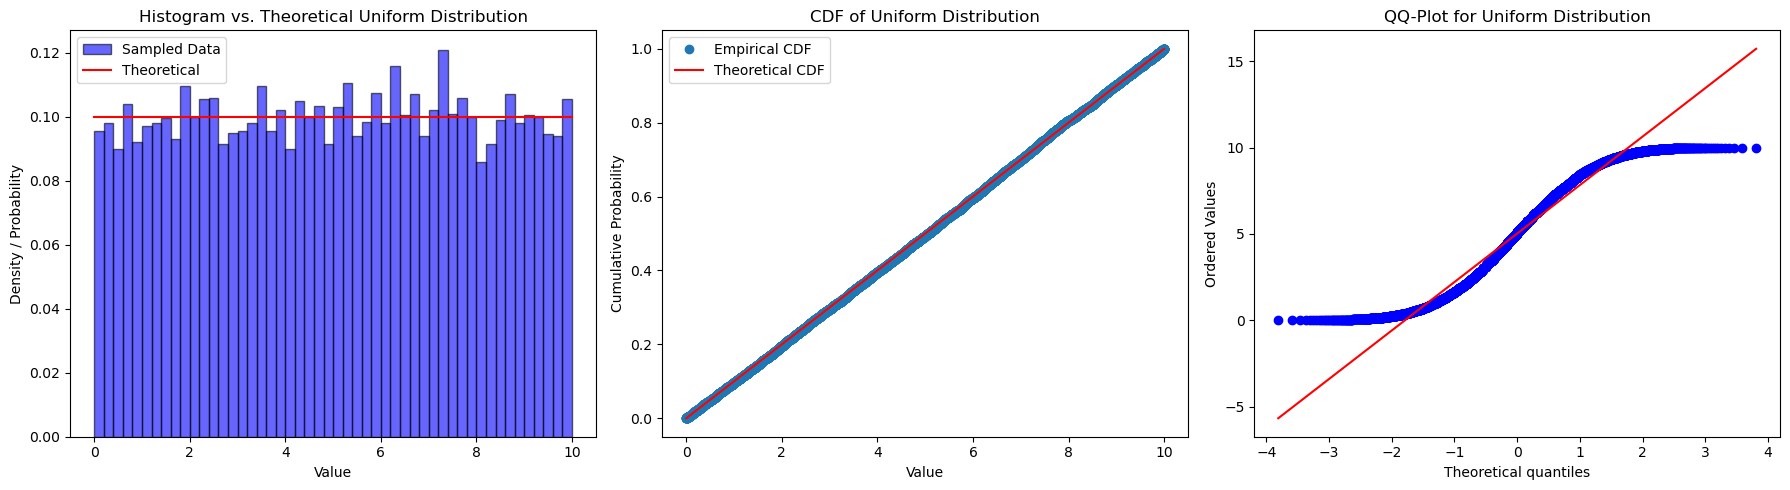

In [7]:
plot_distribution(samples, "Uniform Distribution", stats.uniform, (0, 10))


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [8]:
def mle_uniform(samples):
    """ MLE for Uniform Distribution: Estimates a (min) and b (max) """
    estimated_a = np.min(samples)
    estimated_b = np.max(samples)
    return estimated_a, estimated_b

# Example usage
estimated_a, estimated_b = mle_uniform(samples)
print(f"MLE Estimated a: {estimated_a}, b: {estimated_b}")


MLE Estimated a: 0.0002901348058570452, b: 9.999245221340644


- Method of Moments (MoM)

In [9]:
def mom_uniform(samples):
    """ MoM for Uniform Distribution: Estimates a (min) and b (max) """
    sample_mean = np.mean(samples)
    sample_var = np.var(samples)

    estimated_a = sample_mean - np.sqrt(3 * sample_var)
    estimated_b = sample_mean + np.sqrt(3 * sample_var)
    
    return estimated_a, estimated_b

# Example usage
estimated_a, estimated_b = mom_uniform(samples)
print(f"MoM Estimated a: {estimated_a}, b: {estimated_b}")


MoM Estimated a: 0.06024743347820216, b: 9.990673897361997


- Bayesian Inference

In [10]:
import scipy.stats as stats

def bayesian_uniform(samples, prior_range=(0, 20)):
    """ Bayesian estimation for Uniform Distribution using weakly informative priors """
    prior_a = stats.uniform(0, prior_range[1])  # Prior for a
    prior_b = stats.uniform(0, prior_range[1])  # Prior for b

    estimated_a = np.min(samples)  # Approximate MAP estimate
    estimated_b = np.max(samples)

    return estimated_a, estimated_b

# Example usage
estimated_a, estimated_b = bayesian_uniform(samples)
print(f"Bayesian Estimated a: {estimated_a}, b: {estimated_b}")


Bayesian Estimated a: 0.0002901348058570452, b: 9.999245221340644


<hr style="border: 1px dotted white;">

[Back to the Continuous Distributions](#02-Continuous-Distributions)

### `Normal`

(Gaussian)

#### Sample from Distribution

In [11]:
import numpy as np

# Define parameters
mean = 0    
std_dev = 1  
size = 10000  

# Generate samples
samples = np.random.normal(mean, std_dev, size)

# Print first 10 samples
print(samples[:10])


[-0.73314062  0.14630931 -0.60625242 -1.65389479 -0.16370633 -0.21807985
 -1.93733255  1.47066325 -0.38677095 -0.85449504]


#### Key Properties

In [12]:
# Define x range
x = np.linspace(min(samples), max(samples), 100)

# 1. Probability Density Function (PDF)
pdf_values = stats.norm.pdf(x, np.mean(samples), np.std(samples))

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.norm.cdf(x, np.mean(samples), np.std(samples))


In [13]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: -0.003838602089316545, Variance: 0.97697782294452, Std Dev: 0.9884218850999404
Skewness: -0.015699615724256547, Kurtosis: 0.0017932428716651572


In [14]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=0.97697782294452, 3rd=-0.015160589222733287, 4th=2.8651686241938448


#### Visualizing Distributions

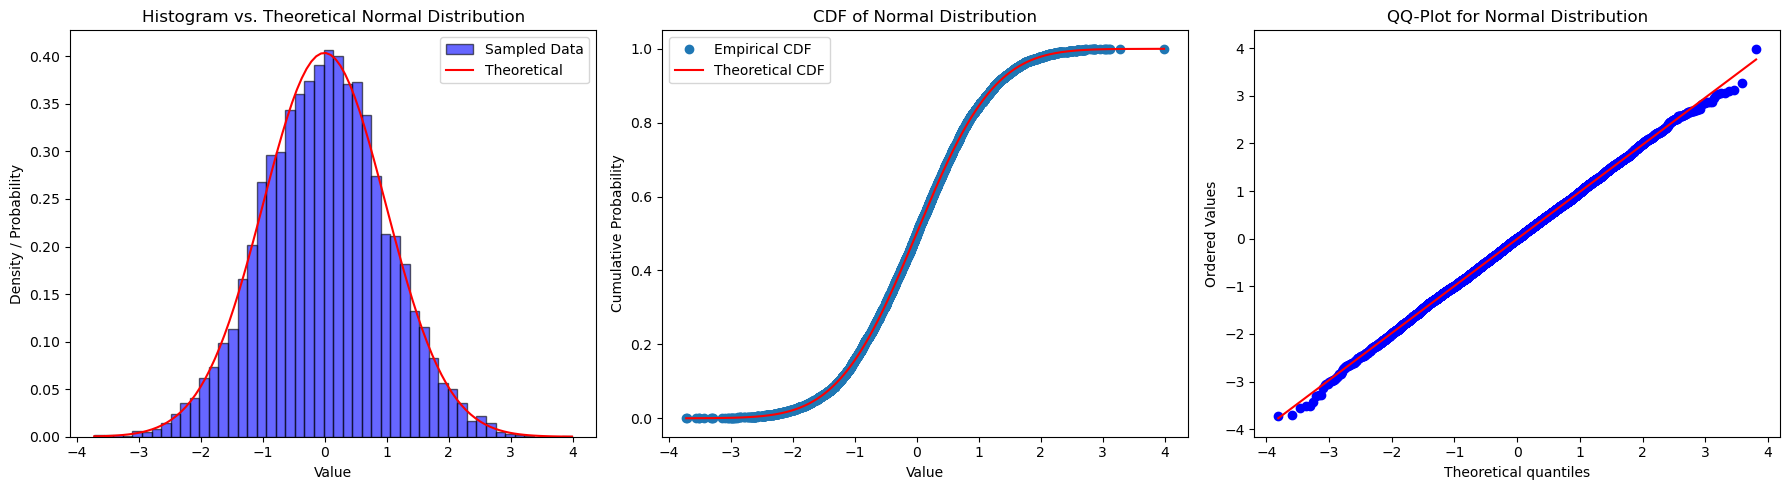

In [15]:
plot_distribution(samples, "Normal Distribution", stats.norm, (np.mean(samples), np.std(samples)))


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [16]:
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize

def mle_normal(samples):
    """ MLE for Normal Distribution """
    def neg_log_likelihood(params):
        mu, sigma = params
        return -np.sum(stats.norm.logpdf(samples, mu, sigma))
    
    init_params = [np.mean(samples), np.std(samples)]
    result = minimize(neg_log_likelihood, init_params, method="L-BFGS-B")
    return result.x  # [estimated_mu, estimated_sigma]

# Example usage
estimated_mu, estimated_sigma = mle_normal(samples)
print(f"MLE Estimated μ: {estimated_mu}, σ: {estimated_sigma}")


MLE Estimated μ: -0.003838602089316545, σ: 0.9884218850999404


In [17]:
from scipy.optimize import minimize

def mle_normal(samples):
    """ MLE for Normal Distribution: Estimates mean and std deviation """
    def neg_log_likelihood(params):
        mu, sigma = params
        return -np.sum(stats.norm.logpdf(samples, mu, sigma))
    
    init_params = [np.mean(samples), np.std(samples)]
    result = minimize(neg_log_likelihood, init_params, method="L-BFGS-B")
    return result.x  # [estimated_mu, estimated_sigma]

# Example usage
estimated_mu, estimated_sigma = mle_normal(samples)
print(f"MLE Estimated μ: {estimated_mu}, σ: {estimated_sigma}")


MLE Estimated μ: -0.003838602089316545, σ: 0.9884218850999404


- Method of Moments (MoM)

In [18]:
def mom_normal(samples):
    """ MoM for Normal Distribution: Estimates mean and std deviation """
    estimated_mu = np.mean(samples)
    estimated_sigma = np.std(samples)
    return estimated_mu, estimated_sigma

# Example usage
estimated_mu, estimated_sigma = mom_normal(samples)
print(f"MoM Estimated μ: {estimated_mu}, σ: {estimated_sigma}")


MoM Estimated μ: -0.003838602089316545, σ: 0.9884218850999404


- Bayesian Inference

In [19]:
def bayesian_normal(samples, prior_mu=0, prior_sigma=10):
    """ Bayesian estimation for Normal Distribution using Normal-Gamma prior """
    n = len(samples)
    sample_mean = np.mean(samples)
    sample_var = np.var(samples)

    posterior_mu = (prior_mu + n * sample_mean) / (n + 1)
    posterior_sigma = np.sqrt(sample_var / (n + 1))

    return posterior_mu, posterior_sigma

# Example usage
estimated_mu, estimated_sigma = bayesian_normal(samples)
print(f"Bayesian Estimated μ: {estimated_mu}, σ: {estimated_sigma}")


Bayesian Estimated μ: -0.003838218267489796, σ: 0.009883724677119588


<hr style="border: 1px dotted white;">

[Back to the Continuous Distributions](#02-Continuous-Distributions)

### `Exponential`

#### Sample from Distribution

In [20]:
import numpy as np

# Define parameter
lambda_ = 1.0  # Rate parameter (1/mean)
size = 10000  

# Generate samples
samples = np.random.exponential(1/lambda_, size)

# Print first 10 samples
print(samples[:10])

[1.19236459 0.44159054 0.16439275 0.35026044 0.19207956 0.36917205
 0.72170555 0.55908455 0.75819527 0.22833847]


#### Key Properties

In [21]:
# Define x range
x = np.linspace(min(samples), max(samples), 100)

# 1. Probability Density Function (PDF)
pdf_values = stats.expon.pdf(x, scale=np.mean(samples))

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.expon.cdf(x, scale=np.mean(samples))


In [22]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 0.9950997367320984, Variance: 1.0151532279669424, Std Dev: 1.0075481268738196
Skewness: 1.9881739230455782, Kurtosis: 5.74839814721153


In [23]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=1.0151532279669424, 3rd=2.033535569083478, 4th=9.015539900115037


#### Visualizing Distributions

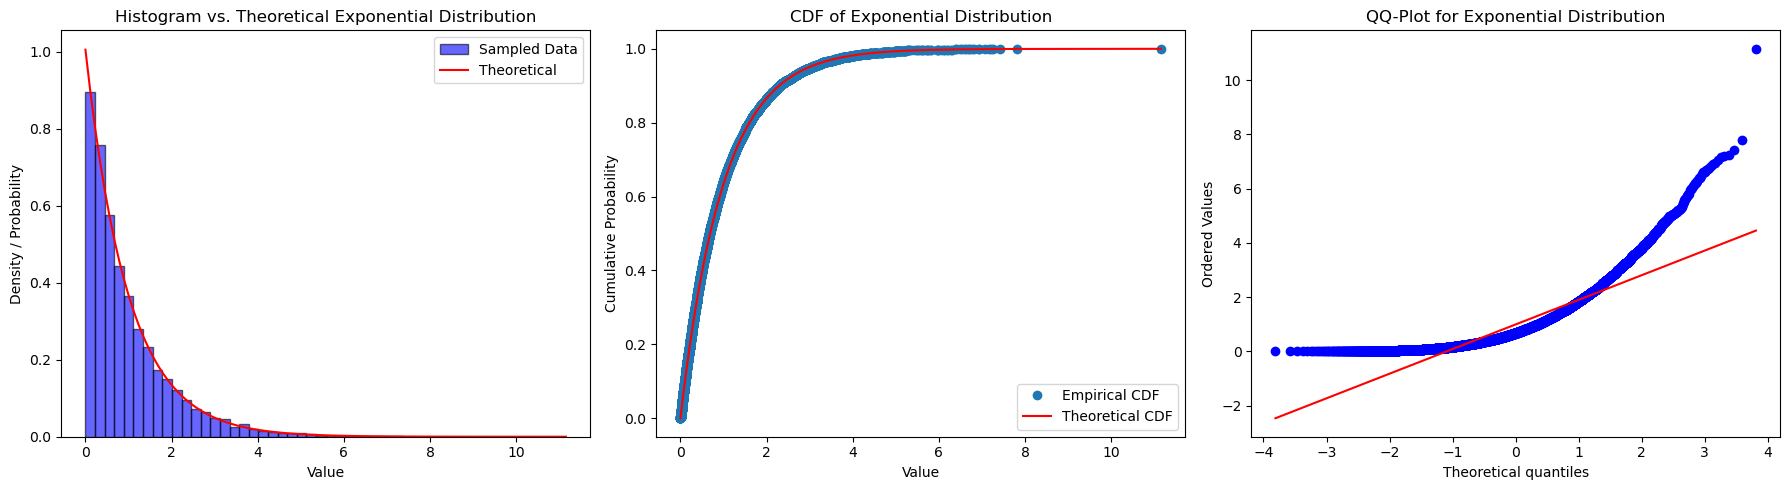

In [24]:
plot_distribution(samples, "Exponential Distribution", stats.expon, (0, np.mean(samples)))


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [25]:
def mle_exponential(samples):
    """ MLE for Exponential Distribution: Estimates lambda (rate parameter) """
    estimated_lambda = 1 / np.mean(samples)
    return estimated_lambda

# Example usage
estimated_lambda = mle_exponential(samples)
print(f"MLE Estimated λ: {estimated_lambda}")


MLE Estimated λ: 1.004924394095404


- Method of Moments (MoM)

In [26]:
def mom_exponential(samples):
    """ MoM for Exponential Distribution: Estimates lambda (rate parameter) """
    sample_mean = np.mean(samples)
    estimated_lambda = 1 / sample_mean
    return estimated_lambda

# Example usage
estimated_lambda = mom_exponential(samples)
print(f"MoM Estimated λ: {estimated_lambda}")


MoM Estimated λ: 1.004924394095404


- Bayesian Inference

In [27]:
def bayesian_exponential(samples, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Exponential Distribution using Gamma prior """
    n = len(samples)
    posterior_alpha = alpha_prior + n
    posterior_beta = beta_prior + np.sum(samples)

    return posterior_alpha, posterior_beta

# Example usage
posterior_alpha, posterior_beta = bayesian_exponential(samples)
print(f"Bayesian Estimated λ ~ Gamma({posterior_alpha}, {posterior_beta})")


Bayesian Estimated λ ~ Gamma(10001, 9951.997367320984)


<hr style="border: 1px dotted white;">

[Back to the Continuous Distributions](#02-Continuous-Distributions)

### `Chi Square`


#### Sample from Distribution

In [28]:
import numpy as np

# Define degrees of freedom
df = 4  
size = 10000  

# Generate samples
samples = np.random.chisquare(df, size)

# Print first 10 samples
print(samples[:10])


[ 6.63610965  4.51483267 10.40271265 10.92688593  6.07359671  0.5951048
  5.42027632  3.75945501  7.36539369  3.22959786]


#### Key Properties

In [29]:
# Define x range
x = np.linspace(min(samples), max(samples), 100)

# Degrees of freedom (df) estimated from sample mean
df = np.mean(samples)

# 1. Probability Density Function (PDF)
pdf_values = stats.chi2.pdf(x, df)

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.chi2.cdf(x, df)


In [30]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 3.9823518239822167, Variance: 7.897995069733678, Std Dev: 2.8103371807905324
Skewness: 1.470347806397082, Kurtosis: 3.658010297494801


In [31]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=7.897995069733678, 3rd=32.635882842259065, 4th=415.3155376576856


#### Visualizing Distributions

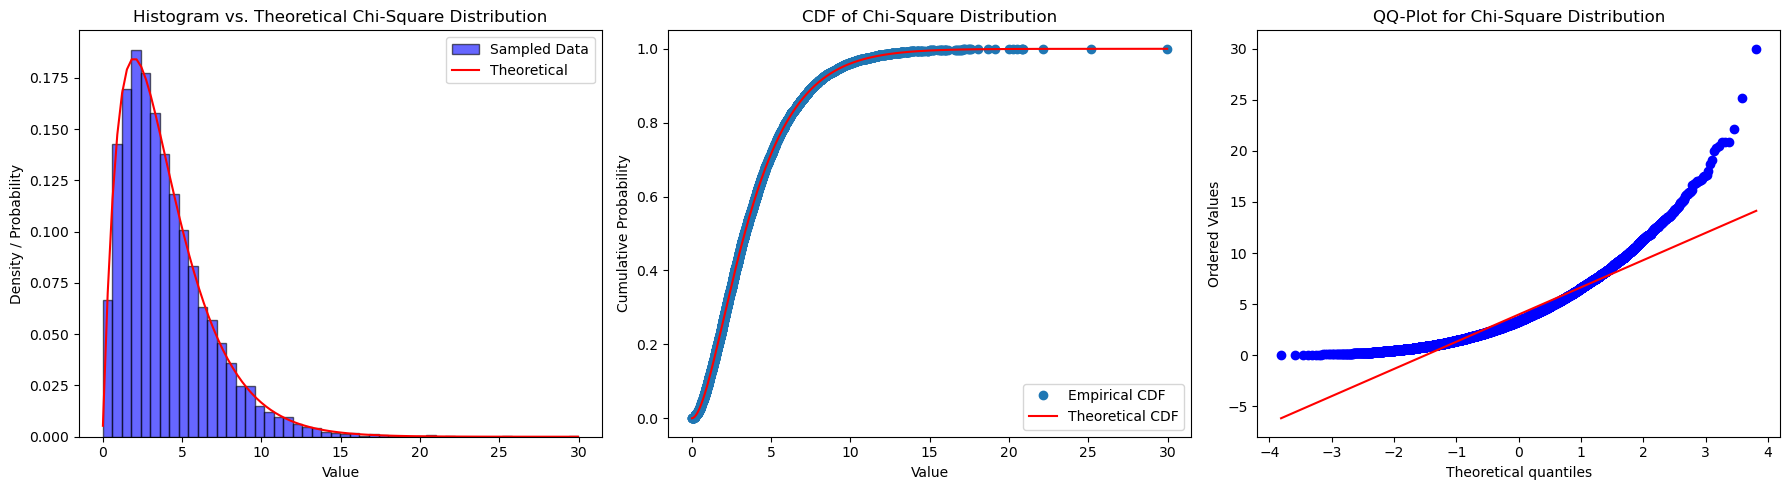

In [32]:
plot_distribution(samples, "Chi-Square Distribution", stats.chi2, (np.mean(samples),))


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [33]:
def mle_chi_square(samples):
    """ MLE for Chi-Square Distribution: Estimates degrees of freedom (df) """
    estimated_df = np.mean(samples)
    return estimated_df

# Example usage
estimated_df = mle_chi_square(samples)
print(f"MLE Estimated df: {estimated_df}")


MLE Estimated df: 3.9823518239822167


- Method of Moments (MoM)

In [34]:
def mom_chi_square(samples):
    """ MoM for Chi-Square Distribution: Estimates degrees of freedom (df) """
    estimated_df = np.mean(samples)
    return estimated_df

# Example usage
estimated_df = mom_chi_square(samples)
print(f"MoM Estimated df: {estimated_df}")


MoM Estimated df: 3.9823518239822167


- Bayesian Inference

In [35]:
def bayesian_chi_square(samples, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Chi-Square Distribution using Gamma prior """
    n = len(samples)
    posterior_alpha = alpha_prior + n / 2
    posterior_beta = beta_prior + np.sum(samples) / 2

    return posterior_alpha, posterior_beta

# Example usage
posterior_alpha, posterior_beta = bayesian_chi_square(samples)
print(f"Bayesian Estimated df ~ Gamma({posterior_alpha}, {posterior_beta})")


Bayesian Estimated df ~ Gamma(5001.0, 19912.759119911083)


<hr style="border: 1px dotted white;">

[Back to the Continuous Distributions](#02-Continuous-Distributions)

### `Student t`

#### Sample from Distribution

In [36]:
import numpy as np

# Define degrees of freedom
df = 10  
size = 10000  

# Generate samples
samples = np.random.standard_t(df, size)

# Print first 10 samples
print(samples[:10])


[ 0.26599548 -0.77668483 -0.28313944 -0.42880369 -0.6556411   0.54602382
  0.00790915 -0.65433729  0.94850313 -1.57817133]


#### Key Properties

In [37]:
# Define x range
x = np.linspace(min(samples), max(samples), 100)

# Degrees of freedom (df) estimated from sample variance
df = len(samples) - 1

# 1. Probability Density Function (PDF)
pdf_values = stats.t.pdf(x, df)

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.t.cdf(x, df)


In [38]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: -0.01730429415529607, Variance: 1.2690971864074703, Std Dev: 1.1265421369871036
Skewness: -0.015373682307301734, Kurtosis: 1.106852464648787


In [39]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=1.2690971864074703, 3rd=-0.02197962224846141, 4th=6.6145280731559515


#### Visualizing Distributions

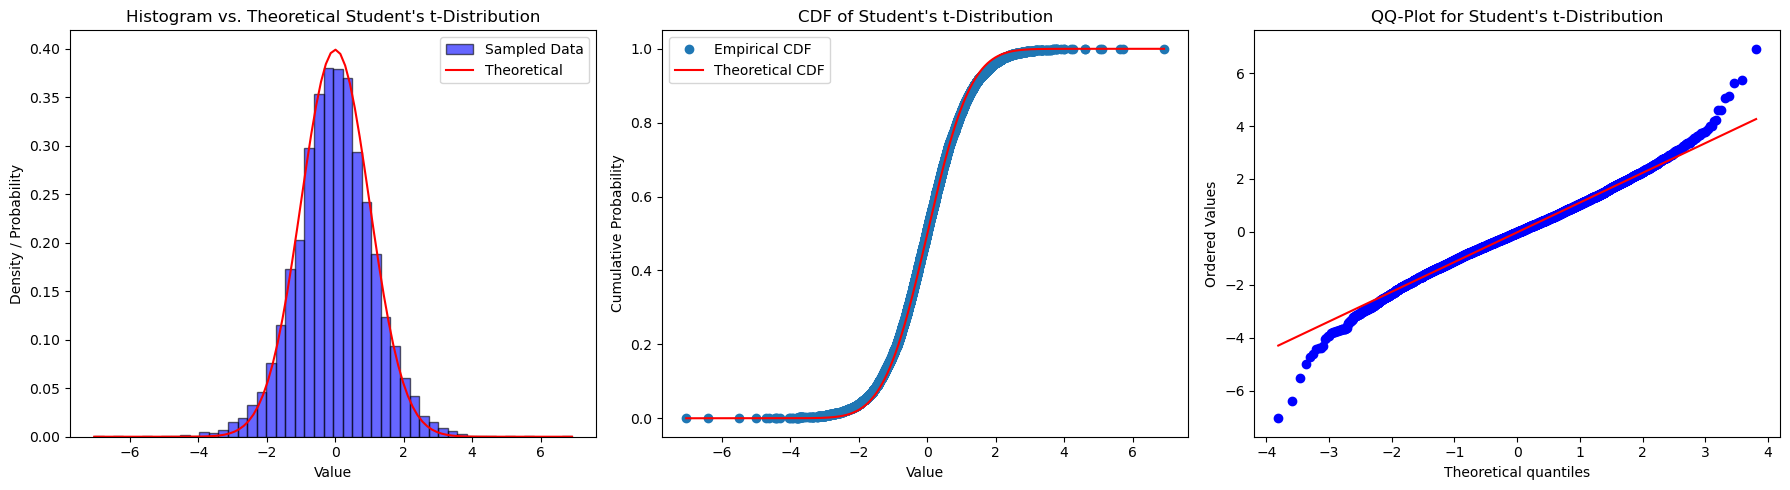

In [40]:
plot_distribution(samples, "Student's t-Distribution", stats.t, (len(samples) - 1,))


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [41]:
def mle_student_t(samples):
    """ MLE for Student's t-Distribution: Estimates degrees of freedom (df) """
    def neg_log_likelihood(df):
        return -np.sum(stats.t.logpdf(samples, df))
    
    result = minimize(neg_log_likelihood, x0=[10], method="L-BFGS-B", bounds=[(1, None)])
    return result.x[0]

# Example usage
estimated_df = mle_student_t(samples)
print(f"MLE Estimated df: {estimated_df}")


MLE Estimated df: 9.539362171944274


- Method of Moments (MoM)

In [42]:
def mom_student_t(samples):
    """ MoM for Student's t-Distribution: Estimates degrees of freedom (df) """
    sample_var = np.var(samples)
    
    def solve_df(df):
        return df / (df - 2) - sample_var  # Equation to solve

    from scipy.optimize import fsolve
    estimated_df = fsolve(solve_df, x0=10)[0]
    return estimated_df

# Example usage
estimated_df = mom_student_t(samples)
print(f"MoM Estimated df: {estimated_df}")


MoM Estimated df: 9.432259053692153


- Bayesian Inference

In [43]:
def bayesian_student_t(samples, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Student's t-Distribution using Gamma prior """
    n = len(samples)
    posterior_alpha = alpha_prior + n / 2
    posterior_beta = beta_prior + np.sum(samples**2) / 2

    return posterior_alpha, posterior_beta

# Example usage
posterior_alpha, posterior_beta = bayesian_student_t(samples)
print(f"Bayesian Estimated df ~ Gamma({posterior_alpha}, {posterior_beta})")


Bayesian Estimated df ~ Gamma(5001.0, 6347.983125018417)


<hr style="border: 1px dotted white;">

[Back to the Continuous Distributions](#02-Continuous-Distributions)

[Back to the top](#Contents)
___

# 03 Discrete Distributions

### `Poisson`

#### Sample from Distribution

In [44]:
import numpy as np

# Define parameter
lambda_ = 3  # Average number of events per interval
size = 10000  

# Generate samples
samples = np.random.poisson(lambda_, size)

# Print first 10 samples
print(samples[:10])


[2 3 3 1 2 1 2 7 4 1]


#### Key Properties

In [45]:
# Define x range (only integer values for discrete distribution)
x = np.arange(min(samples), max(samples)+1)

# Lambda estimated as sample mean
lambda_ = np.mean(samples)

# 1. Probability Mass Function (PMF)
pmf_values = stats.poisson.pmf(x, lambda_)

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.poisson.cdf(x, lambda_)


In [46]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 2.9998, Variance: 2.97379996, Std Dev: 1.7244709217612224
Skewness: 0.5784029536005065, Kurtosis: 0.27551505953008615


In [47]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=2.97379996, 3rd=2.9661842799839984, 4th=28.966972233711985


#### Visualizing Distributions

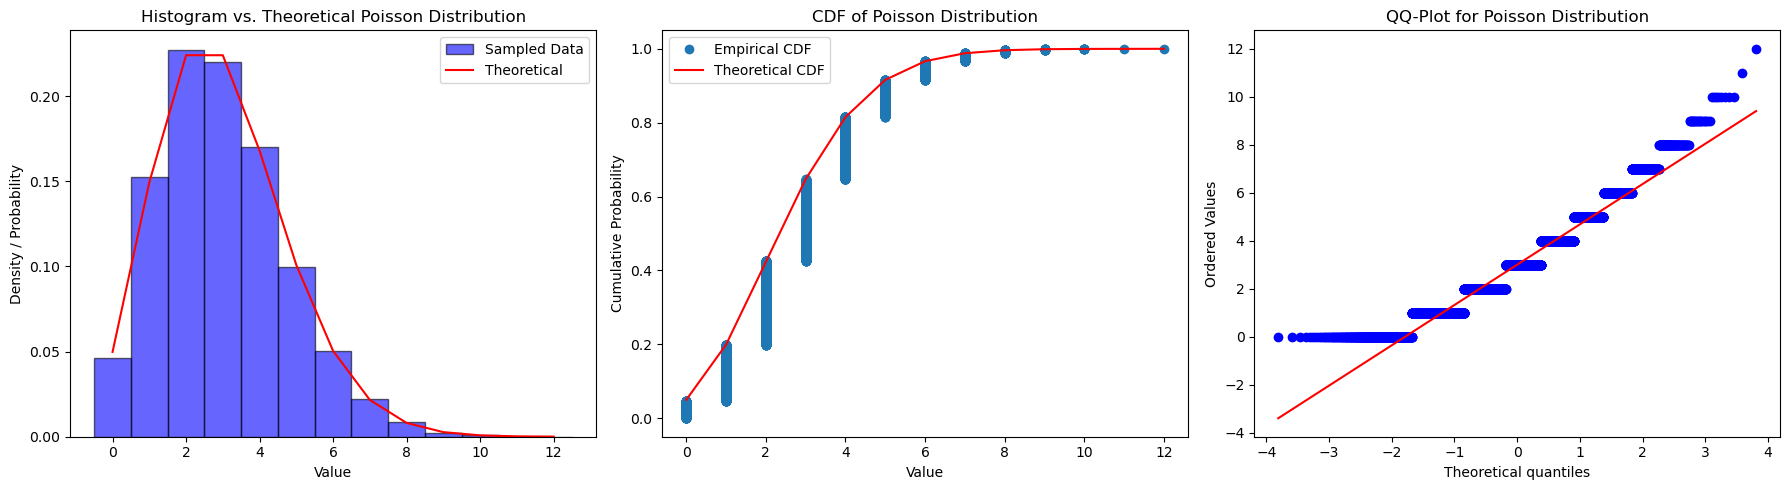

In [48]:
plot_distribution(samples, "Poisson Distribution", stats.poisson, (np.mean(samples),), discrete=True)


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [49]:
def mle_poisson(samples):
    """ MLE for Poisson Distribution: Estimates lambda (mean rate of occurrences) """
    estimated_lambda = np.mean(samples)
    return estimated_lambda

# Example usage
estimated_lambda = mle_poisson(samples)
print(f"MLE Estimated λ: {estimated_lambda}")


MLE Estimated λ: 2.9998


- Method of Moments (MoM)

In [50]:
def mom_poisson(samples):
    """ MoM for Poisson Distribution: Estimates lambda (mean rate of occurrences) """
    estimated_lambda = np.mean(samples)
    return estimated_lambda

# Example usage
estimated_lambda = mom_poisson(samples)
print(f"MoM Estimated λ: {estimated_lambda}")


MoM Estimated λ: 2.9998


- Bayesian Inference

In [51]:
def bayesian_poisson(samples, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Poisson Distribution using Gamma prior """
    posterior_alpha = alpha_prior + np.sum(samples)
    posterior_beta = beta_prior + len(samples)

    return posterior_alpha, posterior_beta

# Example usage
posterior_alpha, posterior_beta = bayesian_poisson(samples)
print(f"Bayesian Estimated λ ~ Gamma({posterior_alpha}, {posterior_beta})")


Bayesian Estimated λ ~ Gamma(29999, 10001)


<hr style="border: 1px dotted white;">

[Back to the Discrete Distributions](#03-Discrete-Distributions)

### `Bernoulli`



In [52]:
import numpy as np

# Define probability of success
p = 0.5  
size = 10000  

# Generate samples (0 or 1 outcomes)
samples = np.random.binomial(1, p, size)

# Print first 10 samples
print(samples[:10])


[0 1 0 1 0 1 1 1 0 0]


#### Sample from Distribution

#### Key Properties

In [53]:
# Define x values (0 and 1 only for Bernoulli)
x = np.array([0, 1])

# Probability of success (p) estimated from sample mean
p = np.mean(samples)

# 1. Probability Mass Function (PMF)
pmf_values = stats.bernoulli.pmf(x, p)

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.bernoulli.cdf(x, p)


In [54]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 0.5014, Variance: 0.24999804000000003, Std Dev: 0.49999803999615844
Skewness: -0.005600021952128876, Kurtosis: -1.9999686397541359


In [55]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=0.24999804000000003, 3rd=-0.0006999945119999749, 4th=0.0625009799884752


#### Visualizing Distributions

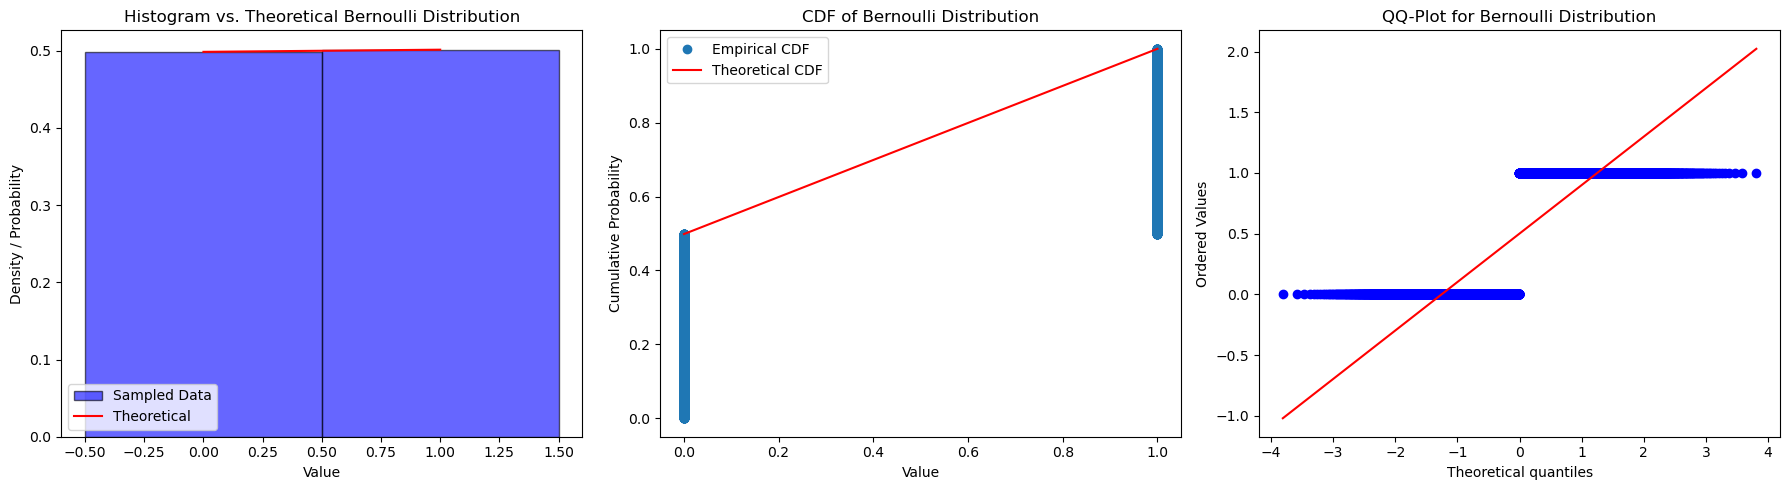

In [56]:
plot_distribution(samples, "Bernoulli Distribution", stats.bernoulli, (np.mean(samples),), discrete=True)


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [57]:
def mle_bernoulli(samples):
    """ MLE for Bernoulli Distribution: Estimates probability of success (p) """
    estimated_p = np.mean(samples)
    return estimated_p

# Example usage
estimated_p = mle_bernoulli(samples)
print(f"MLE Estimated p: {estimated_p}")


MLE Estimated p: 0.5014


- Method of Moments (MoM)

In [58]:
def mom_bernoulli(samples):
    """ MoM for Bernoulli Distribution: Estimates probability of success (p) """
    estimated_p = np.mean(samples)
    return estimated_p

# Example usage
estimated_p = mom_bernoulli(samples)
print(f"MoM Estimated p: {estimated_p}")


MoM Estimated p: 0.5014


- Bayesian Inference

In [59]:
def bayesian_bernoulli(samples, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Bernoulli Distribution using Beta prior """
    successes = np.sum(samples)
    failures = len(samples) - successes

    posterior_alpha = alpha_prior + successes
    posterior_beta = beta_prior + failures

    return posterior_alpha, posterior_beta

# Example usage
posterior_alpha, posterior_beta = bayesian_bernoulli(samples)
print(f"Bayesian Estimated p ~ Beta({posterior_alpha}, {posterior_beta})")


Bayesian Estimated p ~ Beta(5015, 4987)


<hr style="border: 1px dotted white;">

[Back to the Discrete Distributions](#03-Discrete-Distributions)

### `Binomial`


#### Sample from Distribution

In [60]:
import numpy as np

# Define parameters
n = 10   # Number of trials
p = 0.5  # Probability of success
size = 10000  

# Generate samples
samples = np.random.binomial(n, p, size)

# Print first 10 samples
print(samples[:10])

[2 5 3 3 4 6 5 5 2 7]


#### Key Properties

In [61]:
# Define x range (integer values from 0 to max observed trials)
x = np.arange(min(samples), max(samples)+1)

# Number of trials (n) estimated as max observed value
n = max(samples)

# Probability of success (p) estimated from sample mean divided by n
p = np.mean(samples) / n

# 1. Probability Mass Function (PMF)
pmf_values = stats.binom.pmf(x, n, p)

# 2. Cumulative Distribution Function (CDF)
cdf_values = stats.binom.cdf(x, n, p)


In [62]:
# 3. Expected Value (Mean), Variance, and Standard Deviation
mean = np.mean(samples)
variance = np.var(samples)
std_dev = np.std(samples)

# 4. Skewness and Kurtosis
skewness = stats.skew(samples)
kurtosis = stats.kurtosis(samples)

print(f"Mean: {mean}, Variance: {variance}, Std Dev: {std_dev}")
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 4.9829, Variance: 2.49800759, Std Dev: 1.5805086491379918
Skewness: -0.005001671025605797, Kurtosis: -0.22479964497636384


In [63]:
# 5. Moments of Distribution
moment_1 = stats.moment(samples, moment=1)
moment_2 = stats.moment(samples, moment=2)
moment_3 = stats.moment(samples, moment=3)
moment_4 = stats.moment(samples, moment=4)

# Print results
print(f"Moments: 1st={moment_1}, 2nd={moment_2}, 3rd={moment_3}, 4th={moment_4}")

Moments: 1st=0.0, 2nd=2.49800759, 3rd=-0.019747210421998864, 4th=17.317366550907174


#### Visualizing Distributions

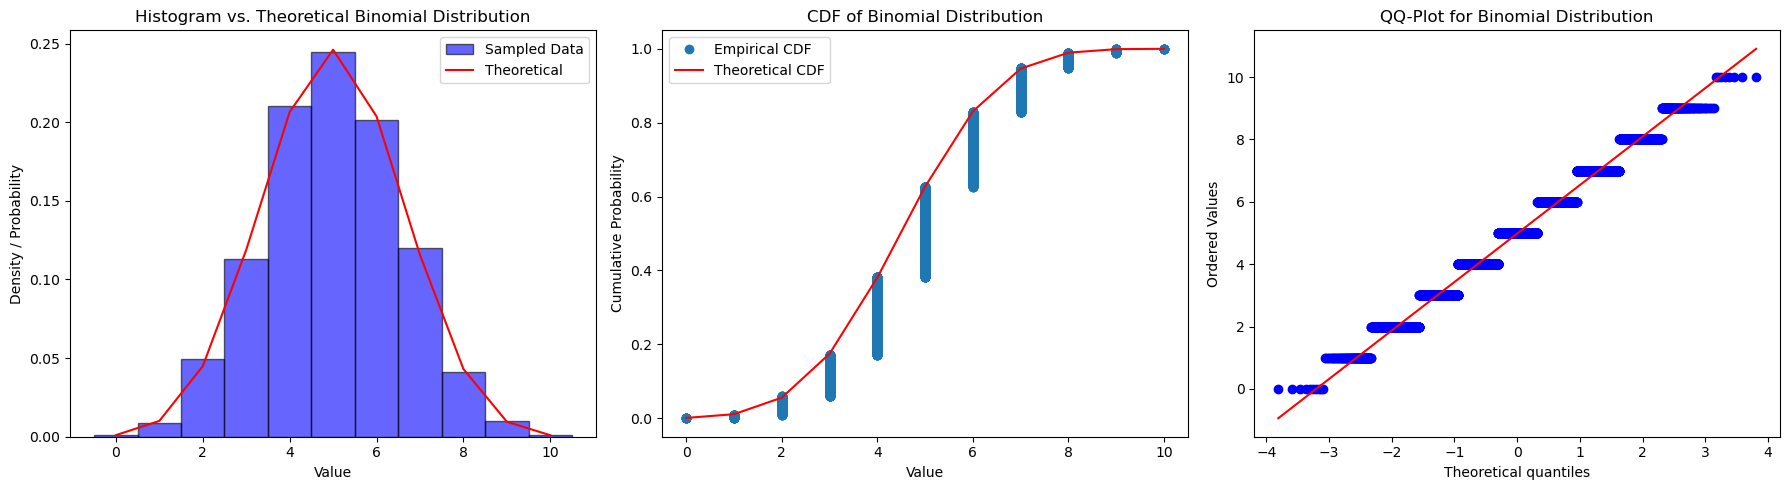

In [64]:
plot_distribution(samples, "Binomial Distribution", stats.binom, (max(samples), np.mean(samples) / max(samples)), discrete=True)


#### Parameter Estimation

- Maximum Likelihood Estimation (MLE)

In [65]:
def mle_binomial(samples, n):
    """ MLE for Binomial Distribution: Estimates probability of success (p) given n trials """
    estimated_p = np.mean(samples) / n
    return estimated_p

# Example usage
n = max(samples)  # Assuming n is the max observed value
estimated_p = mle_binomial(samples, n)
print(f"MLE Estimated p: {estimated_p} (given n={n})")


MLE Estimated p: 0.49829 (given n=10)


- Method of Moments (MoM)

In [66]:
def mom_binomial(samples, n):
    """ MoM for Binomial Distribution: Estimates probability of success (p) given n trials """
    sample_mean = np.mean(samples)
    sample_var = np.var(samples)

    estimated_p = sample_mean / n
    return estimated_p

# Example usage
n = max(samples)  # Assuming n is the max observed value
estimated_p = mom_binomial(samples, n)
print(f"MoM Estimated p: {estimated_p} (given n={n})")

MoM Estimated p: 0.49829 (given n=10)


- Bayesian Inference

In [67]:
from scipy.stats import beta

def bayesian_bernoulli(samples, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Bernoulli distribution """
    successes = np.sum(samples)  # Number of 1s (successes)
    failures = len(samples) - successes  # Number of 0s (failures)
    
    posterior_alpha = alpha_prior + successes
    posterior_beta = beta_prior + failures
    
    return posterior_alpha, posterior_beta

# Example usage
posterior_alpha, posterior_beta = bayesian_bernoulli(samples)
print(f"Posterior Beta(α, β): α={posterior_alpha}, β={posterior_beta}")


Posterior Beta(α, β): α=49830, β=-39828


In [68]:
def bayesian_binomial(samples, n, alpha_prior=1, beta_prior=1):
    """ Bayesian estimation for Binomial Distribution using Beta prior """
    successes = np.sum(samples)

    posterior_alpha = alpha_prior + successes
    posterior_beta = beta_prior + (n * len(samples) - successes)

    return posterior_alpha, posterior_beta

# Example usage
n = max(samples)  # Assuming n is the max observed value
posterior_alpha, posterior_beta = bayesian_binomial(samples, n)
print(f"Bayesian Estimated p ~ Beta({posterior_alpha}, {posterior_beta})")


Bayesian Estimated p ~ Beta(49830, 50172)


<hr style="border: 1px dotted white;">

[Back to the Discrete Distributions](#03-Discrete-Distributions)

[Back to the top](#Contents)
___

# Scratch Notes

Joint, Marginal, and Conditional Probability:
Concepts necessary for understanding relationships between variables.


9. Interview Questions & Exercises
    Conceptual questions
    Coding exercises
    Case study-style problems

5. Sampling from Distributions
    Generating random samples
    Central Limit Theorem (CLT) demonstration
    Law of Large Numbers (LLN) in practice



- `Random Variable`: A variable whose values depend on outcomes of a random phenomenon. Usually denoted by X. X can be Discrete or Continous.

- `Probability Distribution`: Probability values for each values a random variable can theoritically take. Also known as Probability Density Function (PDF).

- `Cumulative Distribution Function` (CDF): A function that describes the probability that a random variable takes on a value less than or equal to a certain value. Think of the sum total of all probability from X = -Infinity to X = 10.